<a href="https://colab.research.google.com/github/Toadoum/Machine-Learning-from-scratch/blob/main/PCA_Sakayo_Toadoum_Sari_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
############################################################################################

The goal: is to apply the PCA on the data to reduce its dimension from 4 to 2.

Apply the PCA algorithm using numpy, here is a summary of the steps:

- Data preprocessing: mean normalization/feature scaling.

- find the covariance matrix (sigma).

- Compute the eigen vectors and eigen values of sigma.

- select k eigen vectors that with the highest variances.

- Transform the data x to the new reduced plane z; 

  z(n,k) = normalized_x(n,d).T * reduced_eigen_vec_matrix(d,k)

In [ ]:
df = pd.read_csv('/content/Data.csv')
df.shape

(150, 4)

In [ ]:
def PCA(df, k):
  x = np.array(df)

  # step 1: calculate the Mean normalization of x
  xbar =x-np.mean(x, axis=0)

  # step 2: calculate covariance matrix from the normalized_x
  # make the parameter rowvar = False; check the documentation of np.cov to see why..
  cov_x=np.cov(xbar, rowvar=False)

  # step 3: compute the eigen values and eigen vectors
  eigvals, eigvecs = np.linalg.eig(cov_x)

  # step 4: sort the eigen values in "descending" order, then use this sorted indicies to sort the eigen vectors.
  desc_order = np.argsort(eigvals)[::-1]
  sorted_eigvals = eigvals[desc_order]
  sorted_eigvecs = eigvecs[:, desc_order]

  # step 5: select k eigen vectors
  eigen_vec_selec = sorted_eigvecs[:,:k]
 
  # step 6: transform the data
  z = xbar@ eigen_vec_selec

  return z

In [ ]:
k = 2 # reduce the data dimensionality to 2
z = PCA(df, k)
principal_df = pd.DataFrame(z, columns=['PC1', 'PC2'])
principal_df.head()

,PC1,PC2
0,-2.684126,-0.319397
1,-2.714142,0.177001
2,-2.888991,0.144949
3,-2.745343,0.318299
4,-2.728717,-0.326755


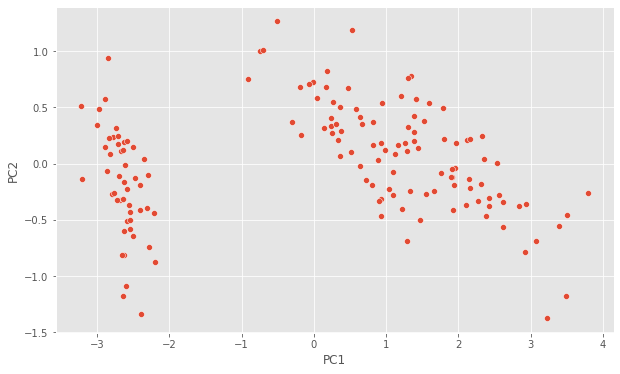

In [ ]:
# Visualize the result of PCA for 2 components
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2')

In [ ]:
###################################################################